<a href="https://colab.research.google.com/github/aryanarora07/ML-AI/blob/main/ANN_with_Keras_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
Flatten(input_shape=(28, 28)), # Flatten the 2D images into a 1D vector
Dense(128, activation='relu'), # Hidden layer with 128 neurons
Dense(64, activation='relu'), # Hidden layer with 64 neurons
Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8628 - loss: 0.4751 - val_accuracy: 0.9568 - val_loss: 0.1449
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9641 - loss: 0.1196 - val_accuracy: 0.9618 - val_loss: 0.1292
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9759 - loss: 0.0771 - val_accuracy: 0.9711 - val_loss: 0.0962
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9824 - loss: 0.0548 - val_accuracy: 0.9703 - val_loss: 0.1036
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9871 - loss: 0.0424 - val_accuracy: 0.9703 - val_loss: 0.1047
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9885 - loss: 0.0345 - val_accuracy: 0.9712 - val_loss: 0.1012
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9907 - loss: 0.0281 - val_accuracy: 0.9732 - val_loss: 0.0990
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9931 - loss: 0.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


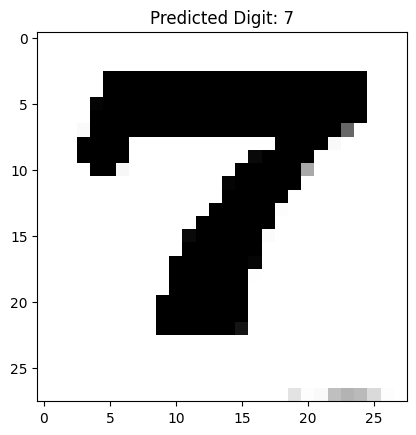

Predicted Class: 7


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Assume the image is a 28x28 pixel image.
# Step 1: Load and preprocess the new image
img_path = 's.jpg'  # Replace with the path to your image

# Load the image, resize to 28x28, and convert to grayscale (if necessary)
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# Convert the image to a NumPy array and normalize the pixel values
img_array = np.array(img) / 255.0

# Step 2: Reshape the image to (1, 28, 28) as the model expects a batch size of 1
img_array = img_array.reshape(1, 28, 28)

# Step 3: Make a prediction
prediction = model.predict(img_array)

# Step 4: Convert the prediction to a readable class (digit)
predicted_class = np.argmax(prediction)

# Step 5: Display the image and the predicted class
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Digit: {predicted_class}")
plt.show()

print(f"Predicted Class: {predicted_class}")
